# Import dependencies

In [34]:
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

# Load datasets and extract images

In [94]:
dataset = np.load('../Datasets/pneumoniamnist.npz')
print("dataset keys: ", pd.DataFrame(dataset).head())

# extract images
train_images = dataset['train_images']
val_images = dataset['val_images']
test_images = dataset['test_images']

# extract labels
train_labels = dataset['train_labels']
val_labels = dataset['val_labels']
test_labels = dataset['test_labels']

dataset keys:                0
0  train_images
1    val_images
2   test_images
3  train_labels
4    val_labels


# Get image dimensions

In [95]:
train_images_shape = np.shape(train_images)
train_labels_shape = np.shape(train_labels)
val_images_shape = np.shape(val_images)
val_labels_shape = np.shape(val_labels)
test_images_shape = np.shape(test_images)
test_labels_shape = np.shape(test_labels)

print("train_images_shape: ", train_images_shape)
print("train_labels_shape: ", train_labels_shape)
print("val_images_shape: ", val_images_shape)
print("val_labels_shape: ", val_labels_shape)
print("test_images_shape: ", test_images_shape)
print("test_labels_shape: ", test_labels_shape)

train_images_shape:  (4708, 28, 28)
train_labels_shape:  (4708, 1)
val_images_shape:  (524, 28, 28)
val_labels_shape:  (524, 1)
test_images_shape:  (624, 28, 28)
test_labels_shape:  (624, 1)


# Visualising images
1 is positive, 0 is negative (for pneumonia)

Test Image, case:  [1]


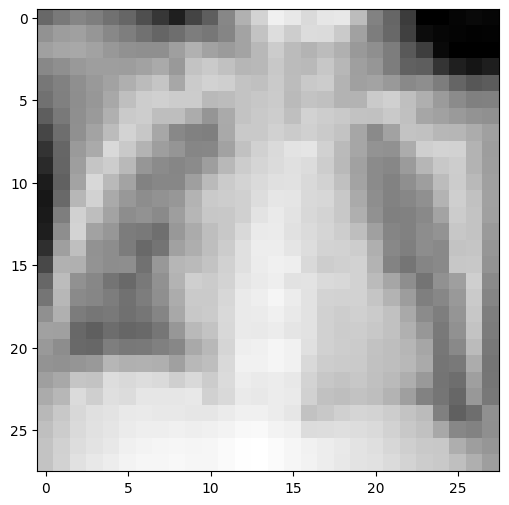

Test Image, case:  [1]


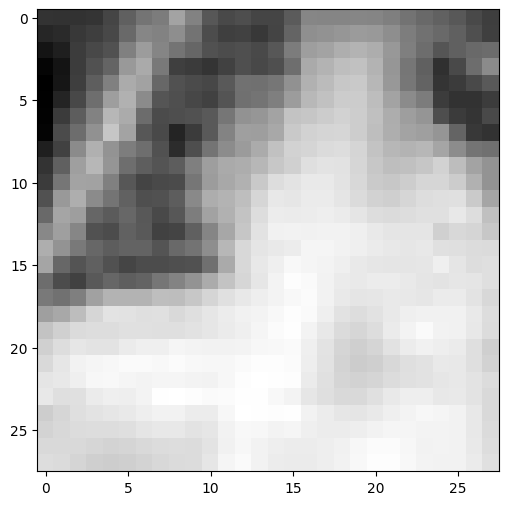

In [96]:
# 0 case
test_image = train_images[0]
test_image_label = train_labels[0]
# print('Test Image as array: ', test_image)
print('Test Image, case: ', test_image_label)
# Visualizing the same image
plt.figure(figsize=(6, 6))
plt.imshow(test_image, cmap='gray') 
plt.show()

# 1 case
test_image_1 = train_images[-1]
test_image_label_1 = train_labels[-1]
print('Test Image, case: ', test_image_label_1)
# Visualizing the same image
plt.figure(figsize=(6, 6))
plt.imshow(test_image_1, cmap='gray') 
plt.show()

# Normalize images to floating point, convert labels, and expand images to fit grey scale channel


In [97]:
# normalize images
train_images_norm = train_images.astype('float32') / 255
val_images_norm = val_images.astype('float32') / 255
test_images_norm = test_images.astype('float32') / 255

# convert labels
train_labels_conv = tf.keras.utils.to_categorical(train_labels)
val_labels_conv = tf.keras.utils.to_categorical(val_labels)
test_labels_conv = tf.keras.utils.to_categorical(test_labels)

# expand image shape
train_images_exp = np.expand_dims(train_images_norm, axis=-1)  # Add an extra dimension for the channel
val_images_exp = np.expand_dims(val_images_norm, axis=-1)
test_images_exp = np.expand_dims(test_images_norm, axis=-1)

# see new shapes
train_images_shape_new = np.shape(train_images_exp)
train_labels_shape_new = np.shape(train_labels_conv)
val_images_shape_new = np.shape(val_images_exp)
val_labels_shape_new = np.shape(val_labels_conv)
test_images_shape_new = np.shape(test_images_exp)
test_labels_shape_new = np.shape(test_labels_conv)

print("train_images_shape: ", train_images_shape_new)
print("train_labels_shape: ", train_labels_shape_new)
print("val_images_shape: ", val_images_shape_new)
print("val_labels_shape: ", val_labels_shape_new)
print("test_images_shape: ", test_images_shape_new)
print("test_labels_shape: ", test_labels_shape_new)

train_images_shape:  (4708, 28, 28, 1)
train_labels_shape:  (4708, 2)
val_images_shape:  (524, 28, 28, 1)
val_labels_shape:  (524, 2)
test_images_shape:  (624, 28, 28, 1)
test_labels_shape:  (624, 2)


# Create CNN model


In [111]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=train_images_exp.shape[1:]),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(test_labels_conv[0]), activation='softmax')
])

model.summary()

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 flatten_5 (Flatten)         (None, 1600)              0         
                                                                 
 dense_10 (Dense)            (None, 64)               

# Train model

In [100]:
history = model.fit(train_images_exp, train_labels_conv, epochs=30, validation_data=(val_images_exp, val_labels_conv))


Epoch 1/30
148/148 [==============================] - 1s 6ms/step - loss: 0.3504 - accuracy: 0.8481 - val_loss: 0.2778 - val_accuracy: 0.8702
Epoch 2/30
148/148 [==============================] - 1s 5ms/step - loss: 0.1813 - accuracy: 0.9276 - val_loss: 0.2290 - val_accuracy: 0.8969
Epoch 3/30
148/148 [==============================] - 1s 6ms/step - loss: 0.1540 - accuracy: 0.9412 - val_loss: 0.1594 - val_accuracy: 0.9351
Epoch 4/30
148/148 [==============================] - 1s 6ms/step - loss: 0.1398 - accuracy: 0.9484 - val_loss: 0.1193 - val_accuracy: 0.9561
Epoch 5/30
148/148 [==============================] - 1s 6ms/step - loss: 0.1229 - accuracy: 0.9531 - val_loss: 0.1092 - val_accuracy: 0.9580
Epoch 6/30
148/148 [==============================] - 1s 6ms/step - loss: 0.1243 - accuracy: 0.9488 - val_loss: 0.1023 - val_accuracy: 0.9637
Epoch 7/30
148/148 [==============================] - 1s 6ms/step - loss: 0.1063 - accuracy: 0.9590 - val_loss: 0.0947 - val_accuracy: 0.9599
Epoch 

# Plot training performance

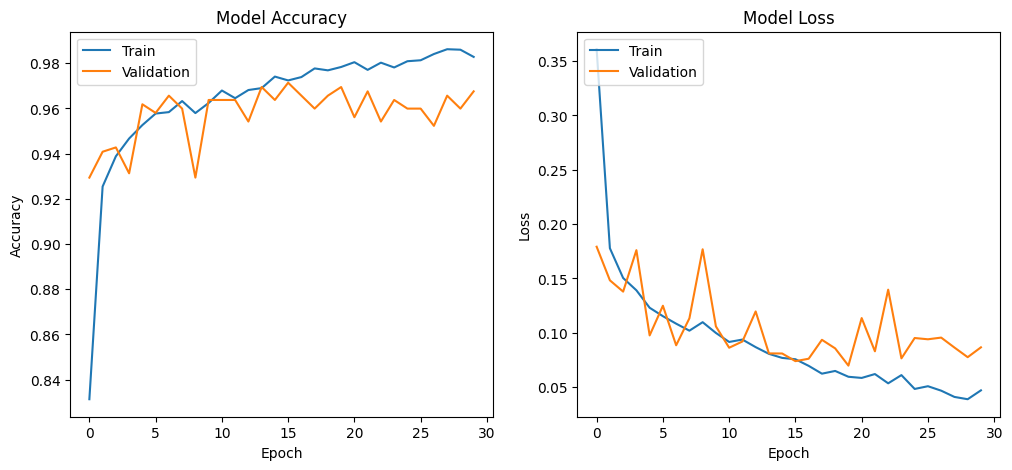

In [89]:
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


# Analyse test accuracy w/ Confusion matrix

20/20 [==============================] - 0s 2ms/step - loss: 0.6291 - accuracy: 0.8670
Test accuracy: 0.8669871687889099
20/20 [==============================] - 0s 2ms/step


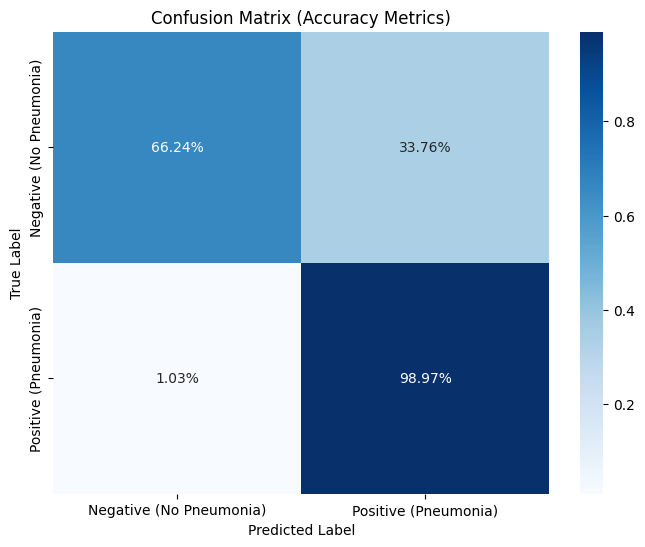

In [103]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

test_loss, test_acc = model.evaluate(test_images_exp, test_labels_conv)
print("Test accuracy:", test_acc)

predicted_classes = np.argmax(model.predict(test_images_exp), axis=1)
true_classes = np.argmax(test_labels_conv, axis=1)

cm = confusion_matrix(true_classes, predicted_classes)

TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]

TN_rate = TN / (TN + FP)
FP_rate = FP / (TN + FP)
FN_rate = FN / (TP + FN)
TP_rate = TP / (TP + FN)

cm_normalized = np.array([[TN_rate, FP_rate], [FN_rate, TP_rate]])

plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Blues', xticklabels=['Negative (No Pneumonia)', 'Positive (Pneumonia)'], yticklabels=['Negative (No Pneumonia)', 'Positive (Pneumonia)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Accuracy Metrics)')
plt.show()

# Analyse Error Images

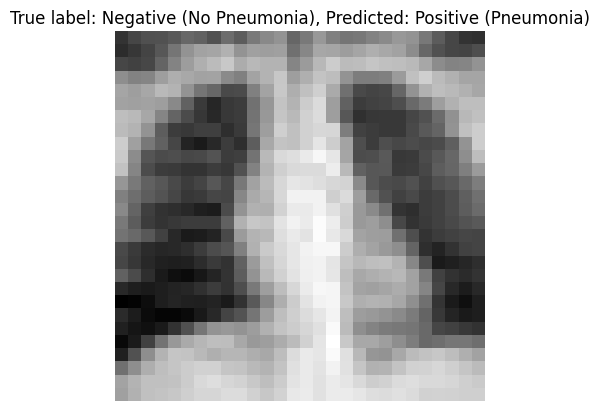

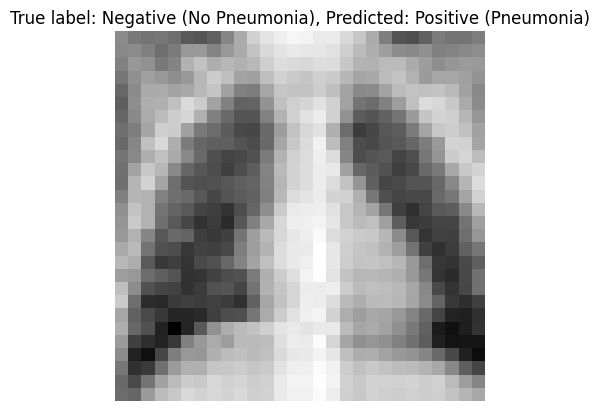

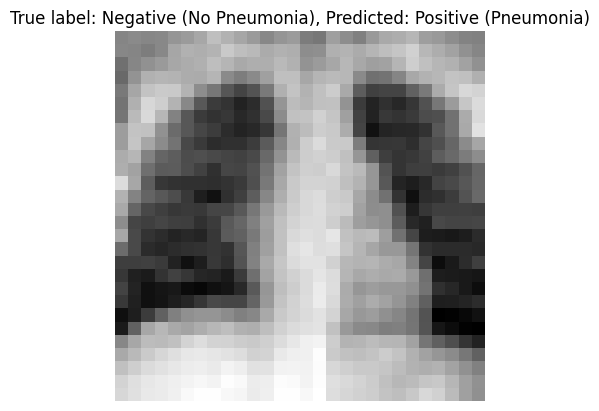

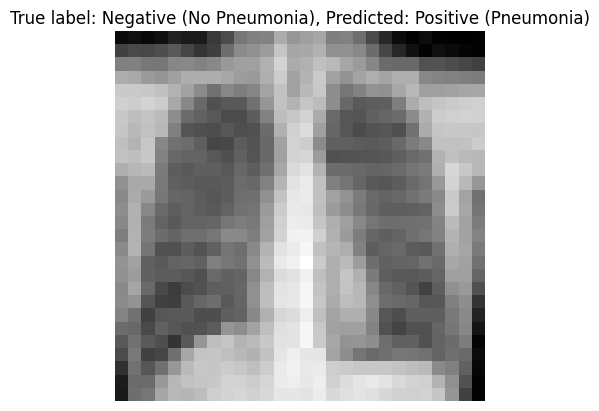

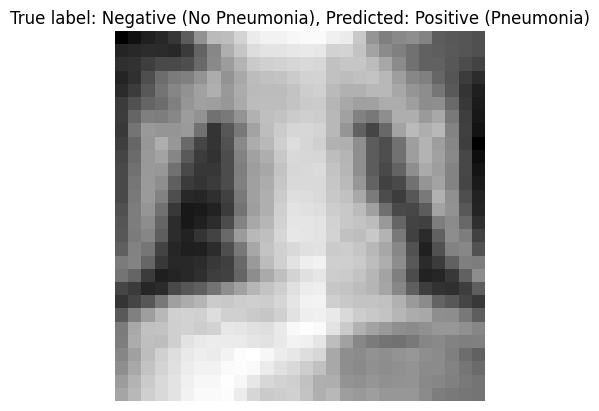

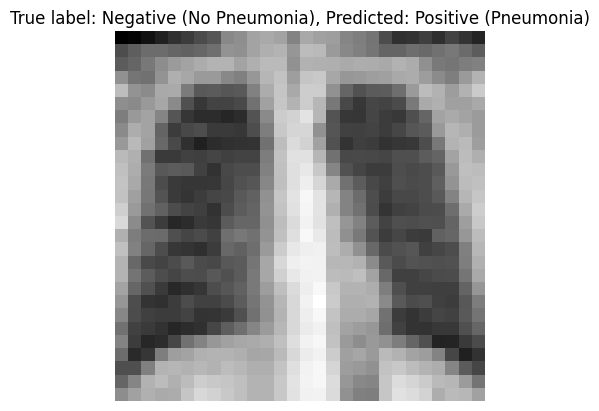

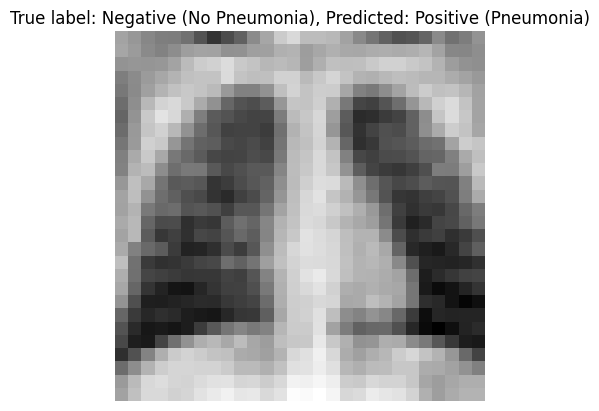

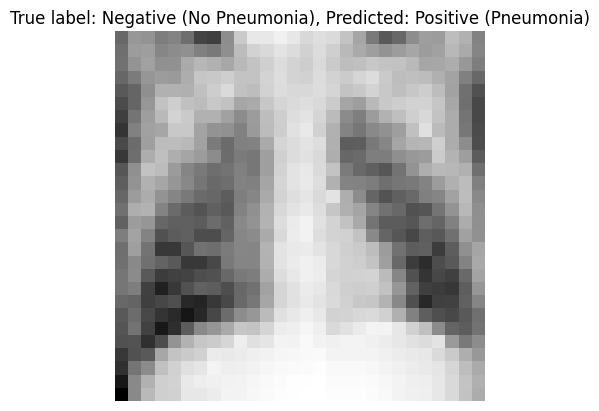

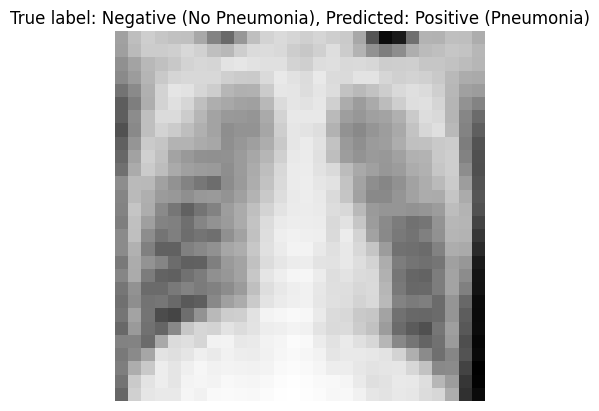

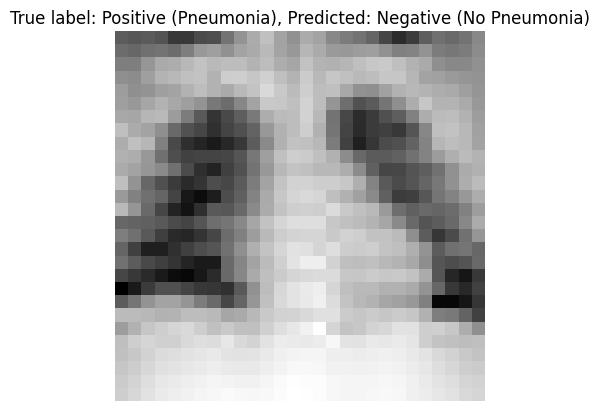

In [104]:
def label_to_string(label):
    return "Positive (Pneumonia)" if label == 1 else "Negative (No Pneumonia)"

misclassified_indices = np.where(predicted_classes != true_classes)[0]
sample_misclassified_indices = np.random.choice(misclassified_indices, 10, replace=False)

for i in sample_misclassified_indices:
    plt.imshow(test_images_exp[i].reshape(28, 28), cmap='gray')
    true_label_str = label_to_string(true_classes[i])
    predicted_label_str = label_to_string(predicted_classes[i])
    plt.title(f"True label: {true_label_str}, Predicted: {predicted_label_str}")
    plt.axis('off')
    plt.show()

# Analyse Distribution of data

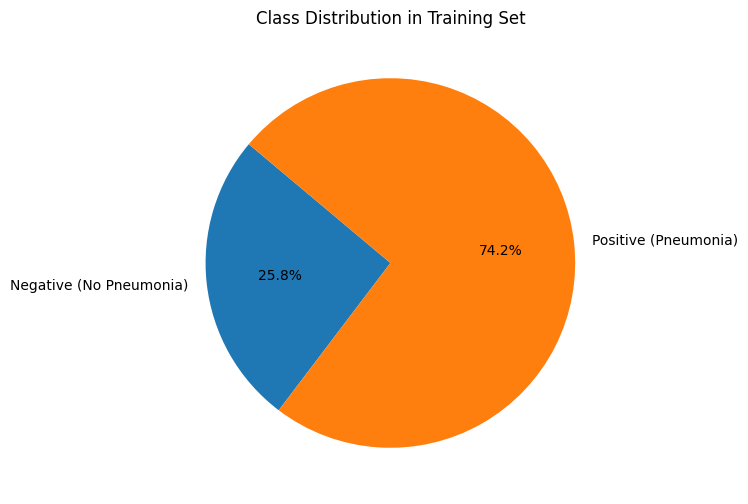

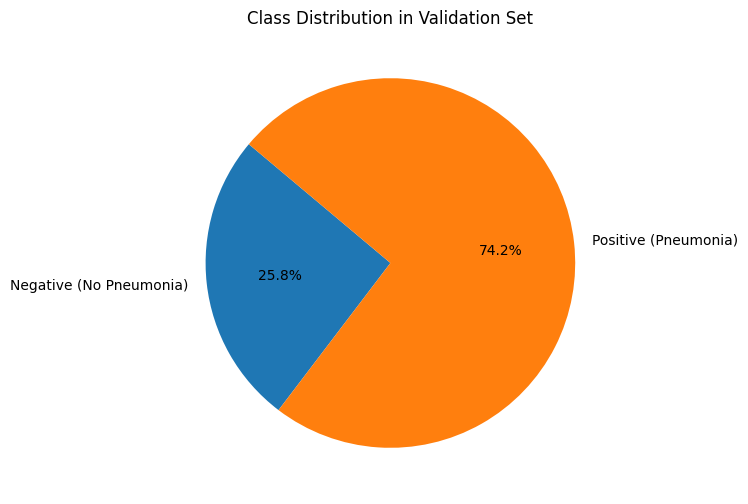

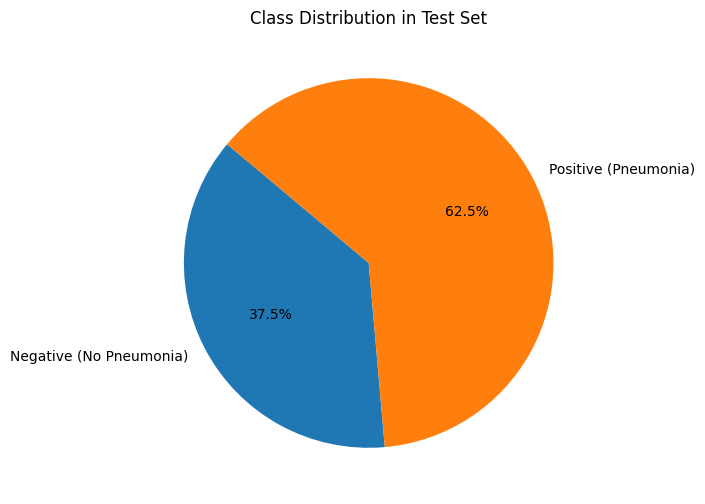

In [105]:
def plot_class_distribution(labels, dataset_name):
    class_counts = np.sum(labels, axis=0)
    class_labels = ['Negative (No Pneumonia)', 'Positive (Pneumonia)']

    plt.figure(figsize=(6, 6))
    plt.pie(class_counts, labels=class_labels, autopct='%1.1f%%', startangle=140)
    plt.title(f'Class Distribution in {dataset_name} Set')
    plt.show()
    return class_counts 

# Plot distribution for each dataset
train_count = plot_class_distribution(train_labels_conv, "Training")
val_count = plot_class_distribution(val_labels_conv, "Validation")
test_count = plot_class_distribution(test_labels_conv, "Test")


# Augmenting new data
From analysing the results, it can be seen that the model underperforms when it comes to predicting negative class and also overfits. We can try data augmentation to try and balance the classes and reduce overfitting on the postive classes.

In [108]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import shuffle
import math

# get counts for negative and positive classes
negative_train_count = train_count[0]
positive_train_count = train_count[1]
# calc how much augmented data is needed
total_synthetic_needed = positive_train_count - negative_train_count
augment_per_image = math.ceil(total_synthetic_needed / negative_train_count)

# Identifying indices of the negative class
negative_class_indices = np.where(np.argmax(train_labels_conv, axis=1) == 0)[0]

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

augmented_images = []
augmented_labels = []

for i in negative_class_indices:
    img = train_images_exp[i].reshape((1,) + train_images_exp[i].shape)
    generated_count = 0
    for x in datagen.flow(img, batch_size=1):
        augmented_images.append(x[0])
        augmented_labels.append(train_labels_conv[i])
        generated_count += 1
        if generated_count >= augment_per_image:
            break

augmented_images = np.array(augmented_images)
augmented_labels = np.array(augmented_labels)

# Combine with original training data
train_images_balanced = np.concatenate((train_images_exp, augmented_images))
train_labels_balanced = np.concatenate((train_labels_conv, augmented_labels))
# shuffle images
train_images_balanced, train_labels_balanced = shuffle(train_images_balanced, train_labels_balanced)


# New distribution of training data

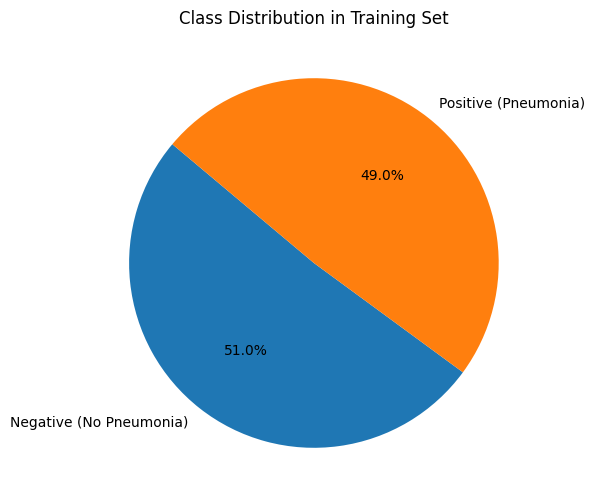

[3642. 3494.]


In [109]:
train_count_balanced = plot_class_distribution(train_labels_balanced, "Training")
print(train_count_balanced)

# Recreate and analyse the model using the new balanced training dataset

In [112]:
from tensorflow.keras.regularizers import l2

model_balanced =  tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=train_images_balanced.shape[1:], kernel_regularizer=l2(0.001)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation='softmax')
])

model_balanced.summary()

model_balanced.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 flatten_6 (Flatten)         (None, 1600)              0         
                                                                 
 dense_12 (Dense)            (None, 128)              

# Train new model

In [113]:
history_balanced = model_balanced.fit(train_images_balanced, train_labels_balanced, epochs=30, validation_data=(val_images_exp, val_labels_conv))

Epoch 1/30
223/223 [==============================] - 2s 7ms/step - loss: 0.4572 - accuracy: 0.8372 - val_loss: 0.3524 - val_accuracy: 0.8855
Epoch 2/30
223/223 [==============================] - 1s 6ms/step - loss: 0.2838 - accuracy: 0.9166 - val_loss: 0.2872 - val_accuracy: 0.9160
Epoch 3/30
223/223 [==============================] - 1s 6ms/step - loss: 0.2599 - accuracy: 0.9263 - val_loss: 0.3414 - val_accuracy: 0.8760
Epoch 4/30
223/223 [==============================] - 1s 6ms/step - loss: 0.2314 - accuracy: 0.9376 - val_loss: 0.2197 - val_accuracy: 0.9351
Epoch 5/30
223/223 [==============================] - 1s 6ms/step - loss: 0.2169 - accuracy: 0.9413 - val_loss: 0.2185 - val_accuracy: 0.9485
Epoch 6/30
223/223 [==============================] - 1s 6ms/step - loss: 0.2026 - accuracy: 0.9493 - val_loss: 0.1947 - val_accuracy: 0.9466
Epoch 7/30
223/223 [==============================] - 1s 6ms/step - loss: 0.1969 - accuracy: 0.9500 - val_loss: 0.1919 - val_accuracy: 0.9561
Epoch 

# Analyse new model

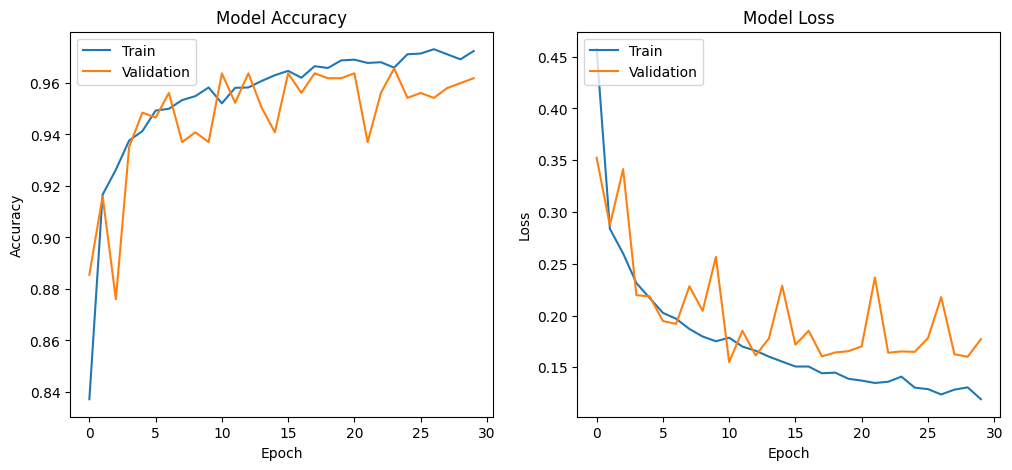

In [114]:
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history_balanced.history['accuracy'])
plt.plot(history_balanced.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history_balanced.history['loss'])
plt.plot(history_balanced.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


20/20 [==============================] - 0s 2ms/step - loss: 0.3519 - accuracy: 0.9006
Test accuracy balanced: 0.9006410241127014
20/20 [==============================] - 0s 2ms/step


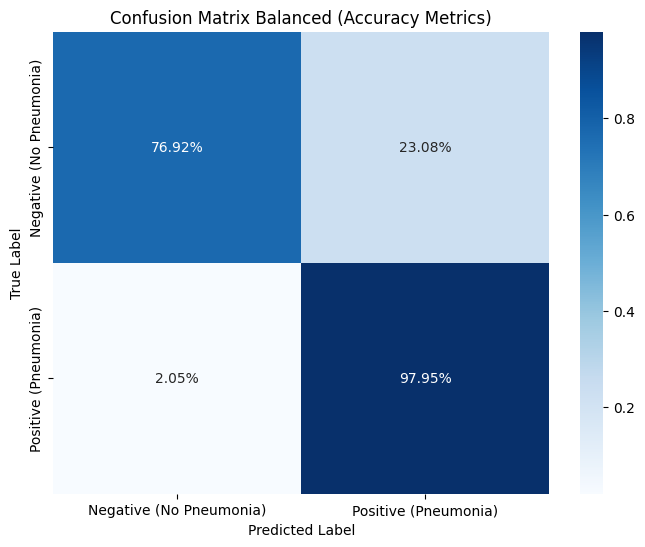

In [115]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

test_loss_balanced, test_acc_balanced = model_balanced.evaluate(test_images_exp, test_labels_conv)
print("Test accuracy balanced:", test_acc_balanced)

predicted_classes_balanced = np.argmax(model_balanced.predict(test_images_exp), axis=1)
true_classes_balanced = np.argmax(test_labels_conv, axis=1)

cm_balanced = confusion_matrix(true_classes_balanced, predicted_classes_balanced)

balanced_TN = cm_balanced[0, 0]
balanced_FP = cm_balanced[0, 1]
balanced_FN = cm_balanced[1, 0]
balanced_TP = cm_balanced[1, 1]

balanced_TN_rate = balanced_TN / (balanced_TN + balanced_FP)
balanced_FP_rate = balanced_FP / (balanced_TN + balanced_FP)
balanced_FN_rate = balanced_FN / (balanced_TP + balanced_FN)
balanced_TP_rate = balanced_TP / (balanced_TP + balanced_FN)

cm_normalized_balanced = np.array([[balanced_TN_rate, balanced_FP_rate], [balanced_FN_rate, balanced_TP_rate]])

plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized_balanced, annot=True, fmt='.2%', cmap='Blues', xticklabels=['Negative (No Pneumonia)', 'Positive (Pneumonia)'], yticklabels=['Negative (No Pneumonia)', 'Positive (Pneumonia)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Balanced (Accuracy Metrics)')
plt.show()